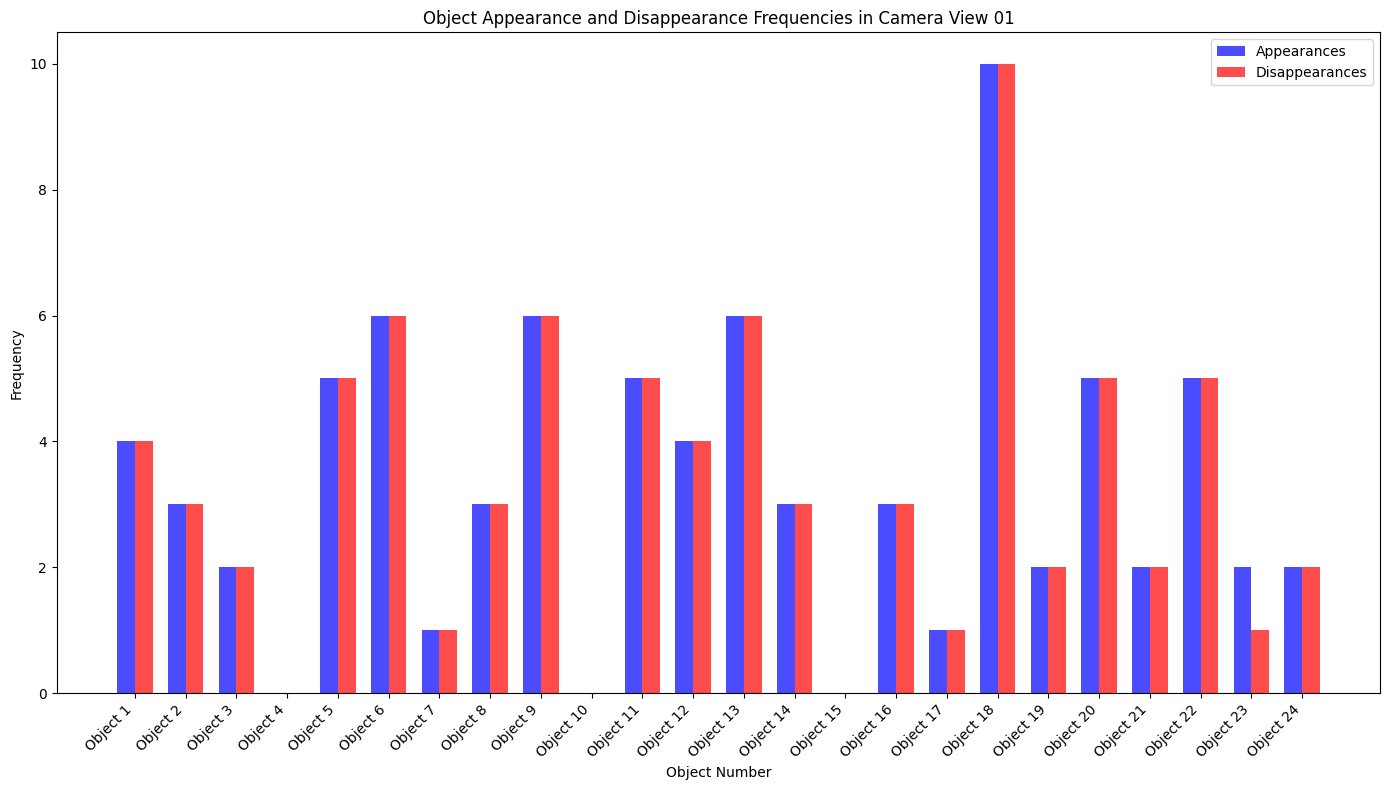

In [1]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Path to the root 'views' directory containing the 36 directories
root_dir = 'D:/Dataset/dana36/views'

# Choose a specific camera view to analyze
selected_view = '01'  # You can change this to any camera view (01 to 36)
annotations_dir = os.path.join(root_dir, selected_view, 'annotations')

# Initialize dictionaries to count appearances and disappearances
appearance_counts = defaultdict(int)  # Key: object index (0-23), Value: appearance count
disappearance_counts = defaultdict(int)  # Key: object index (0-23), Value: disappearance count

# Previous frame states for detecting transitions
previous_states = [[0, 0, 0, 0]] * 24  # Start with zeros for all objects

# Loop through each .txt file in the 'annotations' directory in sorted order (frame sequence)
for annotation_file in sorted(os.listdir(annotations_dir)):
    if annotation_file.endswith('.txt'):
        # Read the content of the .txt file
        with open(os.path.join(annotations_dir, annotation_file), 'r') as file:
            lines = file.readlines()

        # Process each line in the annotation file
        for i, line in enumerate(lines):
            values = list(map(int, line.strip().split(',')))

            # Check for appearance (0 -> non-zero)
            if previous_states[i] == [0, 0, 0, 0] and values != [0, 0, 0, 0]:
                appearance_counts[i] += 1

            # Check for disappearance (non-zero -> 0)
            if previous_states[i] != [0, 0, 0, 0] and values == [0, 0, 0, 0]:
                disappearance_counts[i] += 1

            # Update the previous state for the next iteration
            previous_states[i] = values

# Prepare data for plotting
objects = [f'Object {i + 1}' for i in range(24)]
appearances = [appearance_counts[i] for i in range(24)]
disappearances = [disappearance_counts[i] for i in range(24)]

# Plot the appearances and disappearances side by side
bar_width = 0.35
index = range(24)

plt.figure(figsize=(14, 8))

# Plot appearances
plt.bar(index, appearances, bar_width, label='Appearances', color='b', alpha=0.7)

# Plot disappearances
plt.bar([i + bar_width for i in index], disappearances, bar_width, label='Disappearances', color='r', alpha=0.7)

# Labeling the plot
plt.title(f'Object Appearance and Disappearance Frequencies in Camera View {selected_view}')
plt.xlabel('Object Number')
plt.ylabel('Frequency')
plt.xticks([i + bar_width / 2 for i in index], objects, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()